In [3]:
# Import libraries
import numpy as np
import pandas as pd

# Iterate over all files in the `/kaggle/input` directory and its subdirectories
for dirname, _, filenames in os.walk('/kaggle/input'):
    # For each file, print the full path to the file
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic-dataset/Titanic-Dataset.csv


In [4]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [5]:
# Load the Titanic dataset from the `/kaggle/input/titanic-dataset` directory
train_data = pd.read_csv("/kaggle/input/titanic-dataset/Titanic-Dataset.csv")
test_data = pd.read_csv("/kaggle/input/titanic-dataset/Titanic-Dataset.csv")

# Print essential information about the train_data DataFrame
print("Summary of train_data:")
print(train_data.info())

# Print crucial details about the test_data DataFrame
print("\nSummary of test_data:")
print(test_data.info())

# Display the initial rows of the train_data DataFrame
print("\nFirst few rows of train_data:")
print(train_data.head())

# Display the initial rows of the test_data DataFrame
print("\nFirst few rows of test_data:")
print(test_data.head())

Summary of train_data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Summary of test_data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0  

In [6]:
# Check for missing values in the training data
print("Training Data Null Values:")
print(train_data.isnull().sum())

# Check for missing values in the test data
print("\nTest Data Null Values:")
print(test_data.isnull().sum())

Training Data Null Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Test Data Null Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


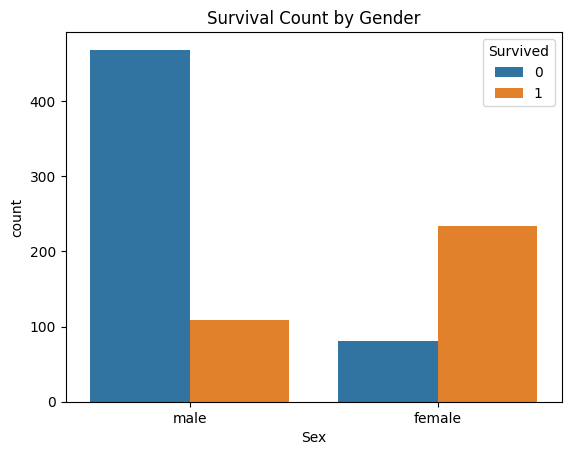

In [9]:
# Import seaborn library for data visualization
import seaborn as sns

# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Create a count plot to visualize survival count by gender
sns.countplot(data=train_data, x='Sex', hue='Survived')

# Set the title of the plot
plt.title('Survival Count by Gender')

# Show the plot
plt.show()

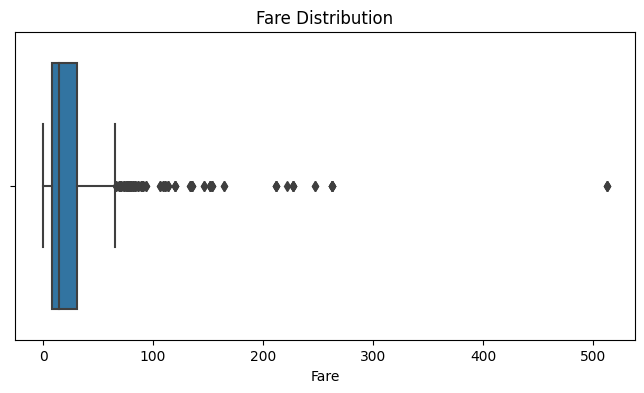

In [7]:
# Import the seaborn library for data visualization
import seaborn as sns

# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Create a boxplot to visualize the distribution of fares
plt.figure(figsize=(8, 4))
sns.boxplot(data=train_data, x='Fare')

# Set the title of the plot
plt.title('Fare Distribution')

# Show the plot
plt.show()

In [10]:
# Separate the dependent variable (y)
y = train_data["Survived"]

# Define the features to be used for modeling
features = ["Pclass", "Sex", "SibSp", "Parch"]

# Create independent variables (X) by applying one-hot encoding to selected features
X = pd.get_dummies(train_data[features])

# Create independent variables for the test data (X_test) using the same features
X_test = pd.get_dummies(test_data[features])

# Print the dependent variable (y)
print("Dependent Variable (y):")
print(y)

# Print the independent variables (X)
print("\nIndependent Variables (X):")
print(X)

# Print the independent variables for the test data (X_test)
print("\nIndependent Variables for Test Data (X_test):")
print(X_test)


Dependent Variable (y):
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

Independent Variables (X):
     Pclass  SibSp  Parch  Sex_female  Sex_male
0         3      1      0       False      True
1         1      1      0        True     False
2         3      0      0        True     False
3         1      1      0        True     False
4         3      0      0       False      True
..      ...    ...    ...         ...       ...
886       2      0      0       False      True
887       1      0      0        True     False
888       3      1      2        True     False
889       1      0      0       False      True
890       3      0      0       False      True

[891 rows x 5 columns]

Independent Variables for Test Data (X_test):
     Pclass  SibSp  Parch  Sex_female  Sex_male
0         3      1      0       False      True
1         1      1      0        True     False
2         3     

In [12]:
from sklearn.preprocessing import StandardScaler# Import StandardScaler for feature scaling

# Create a StandardScaler instance
scaler = StandardScaler()

# Standardize the training data (X)
X_scaled = scaler.fit_transform(X)

# Standardize the test data (X_test) using the same scaler
X_test_scaled = scaler.transform(X_test)

# Print the scaled training data (X_scaled)
print("X_scaled (Training Data):")
print(X_scaled)

# Print the scaled test data (X_test_scaled)
print("\nX_test_scaled (Test Data):")
print(X_test_scaled)


X_scaled (Training Data):
[[ 0.82737724  0.43279337 -0.47367361 -0.73769513  0.73769513]
 [-1.56610693  0.43279337 -0.47367361  1.35557354 -1.35557354]
 [ 0.82737724 -0.4745452  -0.47367361  1.35557354 -1.35557354]
 ...
 [ 0.82737724  0.43279337  2.00893337  1.35557354 -1.35557354]
 [-1.56610693 -0.4745452  -0.47367361 -0.73769513  0.73769513]
 [ 0.82737724 -0.4745452  -0.47367361 -0.73769513  0.73769513]]

X_test_scaled (Test Data):
[[ 0.82737724  0.43279337 -0.47367361 -0.73769513  0.73769513]
 [-1.56610693  0.43279337 -0.47367361  1.35557354 -1.35557354]
 [ 0.82737724 -0.4745452  -0.47367361  1.35557354 -1.35557354]
 ...
 [ 0.82737724  0.43279337  2.00893337  1.35557354 -1.35557354]
 [-1.56610693 -0.4745452  -0.47367361 -0.73769513  0.73769513]
 [ 0.82737724 -0.4745452  -0.47367361 -0.73769513  0.73769513]]


In [14]:
from sklearn.model_selection import train_test_split# Import train_test_split for data splitting

# Split the scaled dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=1)

# Print the training data (X_train)
print("X_train:")
print(X_train)

# Print the validation data (X_val)
print("\nX_val:")
print(X_val)

# Print the training labels (y_train)
print("\ny_train:")
print(y_train)

# Print the validation labels (y_val)
print("\ny_val:")
print(y_val)


X_train:
[[ 0.82737724  1.34013193 -0.47367361 -0.73769513  0.73769513]
 [-1.56610693 -0.4745452  -0.47367361  1.35557354 -1.35557354]
 [-0.36936484 -0.4745452  -0.47367361  1.35557354 -1.35557354]
 ...
 [-0.36936484 -0.4745452  -0.47367361 -0.73769513  0.73769513]
 [ 0.82737724 -0.4745452  -0.47367361  1.35557354 -1.35557354]
 [ 0.82737724 -0.4745452  -0.47367361 -0.73769513  0.73769513]]

X_val:
[[-1.56610693 -0.4745452  -0.47367361  1.35557354 -1.35557354]
 [ 0.82737724 -0.4745452  -0.47367361 -0.73769513  0.73769513]
 [-0.36936484 -0.4745452  -0.47367361  1.35557354 -1.35557354]
 [ 0.82737724 -0.4745452  -0.47367361  1.35557354 -1.35557354]
 [-0.36936484 -0.4745452   2.00893337  1.35557354 -1.35557354]
 [ 0.82737724 -0.4745452  -0.47367361 -0.73769513  0.73769513]
 [-0.36936484 -0.4745452   2.00893337 -0.73769513  0.73769513]
 [-1.56610693  0.43279337 -0.47367361  1.35557354 -1.35557354]
 [-1.56610693  0.43279337 -0.47367361 -0.73769513  0.73769513]
 [ 0.82737724  0.43279337 -0.473